In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,59.964510,4.105165,10.764775,10.698066
1,48.728278,4.647803,7.860027,10.403266
2,54.655345,64.442243,10.154581,21.487413
3,56.981351,1.128537,9.035869,21.861244
4,59.023815,0.371514,12.900746,27.356175
...,...,...,...,...
995,45.219505,5.290962,10.347787,3.740151
996,57.251433,4.032712,10.168299,14.462367
997,59.110617,1.946620,7.814211,14.614850
998,48.601981,2.463785,11.695603,13.812669


In [5]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,59.964510,4.105165,10.764775,10.698066,24.694395
1,48.728278,4.647803,7.860027,10.403266,22.106586
2,54.655345,64.442243,10.154581,21.487413,22.791750
3,56.981351,1.128537,9.035869,21.861244,22.148868
4,59.023815,0.371514,12.900746,27.356175,20.331080


<AxesSubplot:ylabel='Density'>

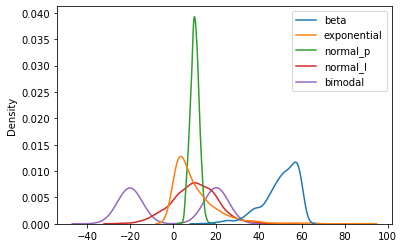

In [6]:
#trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [7]:
#HIển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.083390,10.126418,10.027950,9.924626,-0.064201
std,8.272681,10.549775,2.032427,10.440513,20.346646
min,14.233219,0.000631,3.105958,-24.410157,-31.768374
25%,45.953550,2.997913,8.693383,3.058824,-20.210014
50%,51.782269,6.815129,10.030771,10.079442,0.346782
75%,56.654334,13.786055,11.368054,16.973005,20.082063
max,59.997926,86.852960,17.955756,50.709014,27.699607


<AxesSubplot:ylabel='Density'>

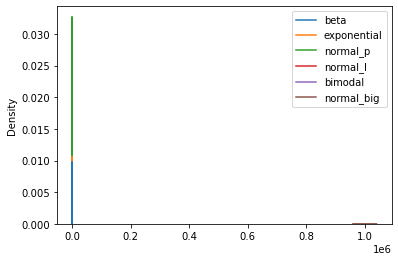

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

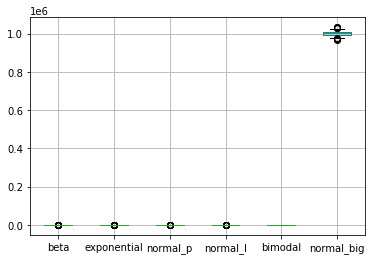

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [11]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.999270,0.047259,0.515752,0.467367,0.949465,0.465027
1,0.753748,0.053507,0.320144,0.463443,0.905949,0.541336
2,0.883260,0.741968,0.474661,0.610997,0.917471,0.585225
3,0.934085,0.012986,0.399326,0.615973,0.906660,0.294265
4,0.978715,0.004270,0.659591,0.689123,0.876093,0.371799


<AxesSubplot:ylabel='Density'>

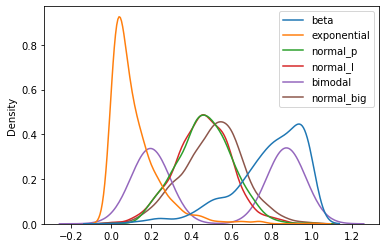

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

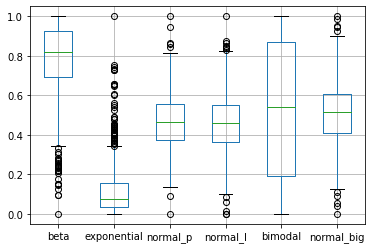

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783358,0.116586,0.466134,0.457071,0.533130,0.507237
std,0.180766,0.121468,0.136866,0.138986,0.342145,0.152697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693118,0.034510,0.376263,0.365672,0.194363,0.408914
50%,0.820481,0.078461,0.466324,0.459132,0.540041,0.518192
75%,0.926940,0.158723,0.556378,0.550900,0.871905,0.606779
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.233219148485508,
 0.0006313204437633116,
 3.105957948060266,
 -24.410157031065744,
 -31.768373724647624,
 966894.4010925074]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99792567205781,
 86.8529604492532,
 17.955756374079908,
 50.70901396512561,
 27.69960666111934,
 1032480.670126178]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 0.9999999999999999, 0.9999999999999998, 1.0, 1.0, 1.0]